# Phân cụm dữ liệu sử dụng DBScan

## I. Chuẩn bị dữ liệu

In [1]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import pandas as pd
import numpy as np

df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

X = df.drop(['Attrition', 'EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1)
y = df['Attrition']

col_int32 = ['DailyRate', 'MonthlyIncome', 'MonthlyRate']
col_int16 = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
             'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 
             'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 
             'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
             'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
             'YearsSinceLastPromotion', 'YearsWithCurrManager']

# ép kiểu
X[col_int32] = X[col_int32].astype('int32')
X[col_int16] = X[col_int16].astype('int16')

X_origin = X.copy()
y_origin = y.copy()

# One-hot cho các cột nominal
one_hot_encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore',
    drop='first'
)

encode_cols = [
    'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

X_encoded_df = pd.DataFrame(
    X_encoded_array, 
    columns=encoded_columns,
    index=X_origin.index
)

# Gộp data sau one-hot
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

# Encode y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_origin)

# Continuous columns cần scale
continuous_data = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Standard Scaler
scaler = StandardScaler()
X_scaled_df = pd.DataFrame(
    scaler.fit_transform(X_encode[continuous_data]),
    columns=continuous_data,
    index=X_encode.index
).astype('float32')

# Gộp cùng dữ liệu còn lại
X_final = pd.concat(
    [
        X_encode.drop(columns=continuous_data), 
        X_scaled_df                       
    ],
    axis=1
)

# One-hot columns cũng ép về float32
one_hot_cols = X_encoded_df.columns
X_final[one_hot_cols] = X_final[one_hot_cols].astype('float32')

# Có 2 loại dữ liệu là X_origin là X ban đầu đã được One Hot và X đã được làm sạch, chuẩn hóa.
X = X_final
X_origin = X_encode

**Dữ liệu đã ban đầu**

In [2]:
X_origin

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36        884                23          2                        3   
1466   39        613                 6          1                        4   
1467   27        155                 4          3                        2   
1468   49       1023                 2          3                        4   
1469   34        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0             94               3         2                4           5993   
1             61               2         2                2           5130   
2             92               2         1                3           2090   
3             56               3         1                3           2909   
4             40               3         1                2           3468   
...          ...             ...       ...              ...            ...   
1465          41               4         2                4           2571   
1466          42               2         3                1           9991   
1467          87               4         2                2           6142   
1468          63               2         2                2           5390   
1469          82               4         2                3           4404   

      ...  JobRole_Laboratory Technician  JobRole_Manager  \
0     ...                            0.0              0.0   
1     ...                            0.0              0.0   
2     ...                            1.0              0.0   
3     ...                            0.0              0.0   
4     ...                            1.0              0.0   
...   ...                            ...              ...   
1465  ...                            1.0              0.0   
1466  ...                            0.0              0.0   
1467  ...                            0.0              0.0   
1468  ...                            0.0              0.0   
1469  ...                            1.0              0.0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                                0.0                        0.0   
1                                0.0                        0.0   
2                                0.0                        0.0   
3                                0.0                        0.0   
4                                0.0                        0.0   
...                              ...                        ...   
1465                             0.0                        0.0   
1466                             0.0                        0.0   
1467                             1.0                        0.0   
1468                             0.0                        0.0   
1469                             0.0                        0.0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                            0.0                      1.0   
1                            1.0                      0.0   
2                            0.0                      0.0   
3                            1.0                      0.0   
4                            0.0                      0.0   
...                          ...                      ...   
1465                         0.0                      0.0   
1466                         0.0                      0.0   
1467                         0.0             

**Dữ liệu đã được chuẩn hóa**

In [3]:
X

Education  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0             2                        2               3         2   
1             1                        3               2         2   
2             2                        4               2         1   
3             4                        4               3         1   
4             1                        1               3         1   
...         ...                      ...             ...       ...   
1465          2                        3               4         2   
1466          1                        4               2         3   
1467          3                        2               4         2   
1468          3                        4               2         2   
1469          3                        2               4         2   

      JobSatisfaction  PerformanceRating  RelationshipSatisfaction  \
0                   4                  3                         1   
1                   2                  4                         4   
2                   3                  3                         2   
3                   3                  3                         3   
4                   2                  3                         4   
...               ...                ...                       ...   
1465                4                  3                         3   
1466                1                  3                         1   
1467                2                  4                         2   
1468                2                  3                         4   
1469                3                  3                         1   

      StockOptionLevel  WorkLifeBalance  BusinessTravel_Travel_Frequently  \
0                    0                1                               0.0   
1                    1                3                               1.0   
2                    0                3                               0.0   
3                    0                3                               1.0   
4                    1                3                               0.0   
...                ...              ...                               ...   
1465                 1                3                               1.0   
1466                 1                3                               0.0   
1467                 1                3                               0.0   
1468                 0                2                               1.0   
1469                 0                4                               0.0   

      ...  MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0     ...      -0.108350     0.726020            2.125136          -1.150554   
1     ...      -0.291719     1.488876           -0.678049           2.129306   
2     ...      -0.937654    -1.674841            1.324226          -0.057267   
3     ...      -0.763634     1.243211           -0.678049          -1.150554   
4     ...      -0.644858     0.325900            2.525591          -0.877232   
...   ...            ...          ...                 ...                ...   
1465  ...      -0.835451    -0.284329            0.523316           0.489376   
1466  ...       0.741140     1.004010            0.523316          -0.057267   
1467  ...      -0.076690    -1.284418           -0.678049           1.309341   
1468  ...      -0.236474    -0.150393           -0.277594          -0.330589   
1469  ...      -0.445978    -0.574124           -0.277594          -0.877232   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0             -0.421642              -2.171982       -0.164613   
1             -0.164511               0.155707        0.488508   
2             -0.550208               0.155707       -1.144294   
3             -0.421642               0.155707        0.161947   
4             -0.678774               0.155707       -0.817734   
...                 ...                   

## Định nghĩa Class, Function

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_X(X, labels):
    X = np.array(X)
    labels = np.array(labels)
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    
    n_features = X.shape[1]

    if n_features == 1:
        plt.figure(figsize=(7,4))
        plt.scatter(X[:, 0], [0]*len(X), c=labels, s=50)
        plt.title("1D Data Visualization")
        plt.yticks([])  # ẩn trục Y
        plt.xlabel("Feature 1")
        plt.show()

    elif n_features == 2:
        plt.figure(figsize=(7,5))
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
        plt.title("2D Data Visualization")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

    elif n_features == 3:
        fig = plt.figure(figsize=(7,5))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, s=50)
        ax.set_title("3D Data Visualization")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.set_zlabel("Feature 3")
        plt.show()

    else:
        raise ValueError("Dữ liệu phải có 1, 2 hoặc 3 chiều để trực quan.")


## II. Thực nghiệm phân tích số cụm

**Nhận xét:**

Để biết xem dữ liệu nên được phân làm bao nhiêu cụm thì ở đây, chúng tôi có một số thực nghiệm cơ bản bằng cách phân cụm sử dụng K-Mean với các tham số là các cụm từ 2 đến 15 cụm.

**Với dữ liệu đã được chuẩn hóa**

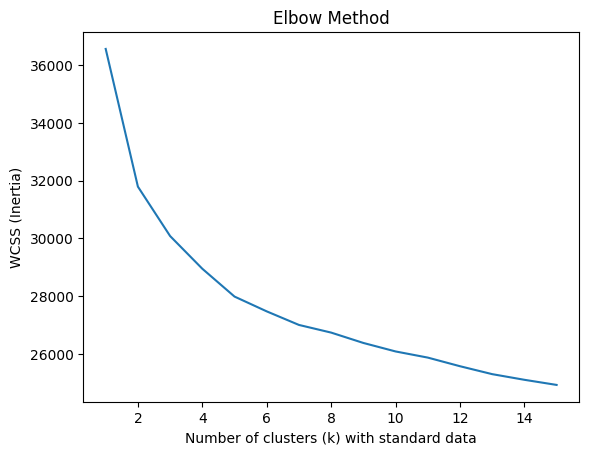

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 16):   
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k) with standard data')
plt.ylabel('WCSS (Inertia)')
plt.show()

Nhận xét:

Qua biểu đồ, ta có thể thấy được WCSS giảm rất mạnh từ 1 đến 3, 4 cho thấy việc tăng số cụm trong khoảng này giúp mô hình cải thiện đáng kể.

Trong khoảng 4 - 6 thì WCSS vẫn còn giảm tuy nhiên chậm hơn, biểu thị rằng cấu trúc các cụm trở nên ổn định dần.

Từ khoảng 6 trở đi thì WCSS giảm tuy nhiên ít hơn ban đầu, điều này cho thấy tăng số cụm không mang lại nhiều ý nghĩa mà chỉ làm chia nhỏ cụm hiện có.

=> Nên ở đây với dữ liệu đã được chuẩn hóa số cụm có thể ước trừng cho mô hình DBScan là khoảng 4 cụm. 

**Với dữ liệu gốc ban đầu**

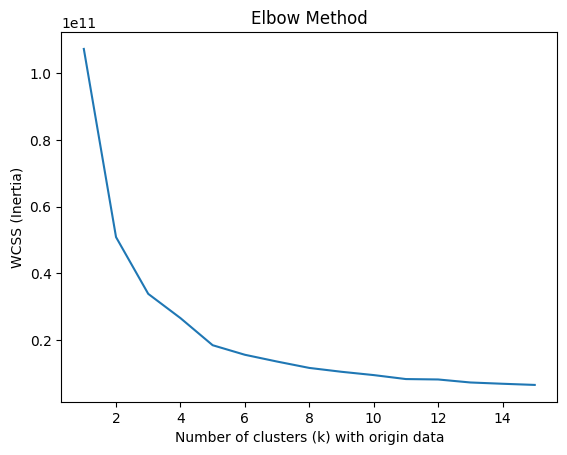

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 16):   
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_origin)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k) with origin data')
plt.ylabel('WCSS (Inertia)')
plt.show()

Nhận xét:

Tương tự với dữ liệu đã được chuẩn hóa thì ở đây chúng tôi ước chừng cho mô hình DBScan là trong khoảng 4 cụm.

## III. Thực hiện phân cụm

### Trực quan dữ liệu đã giảm chiều

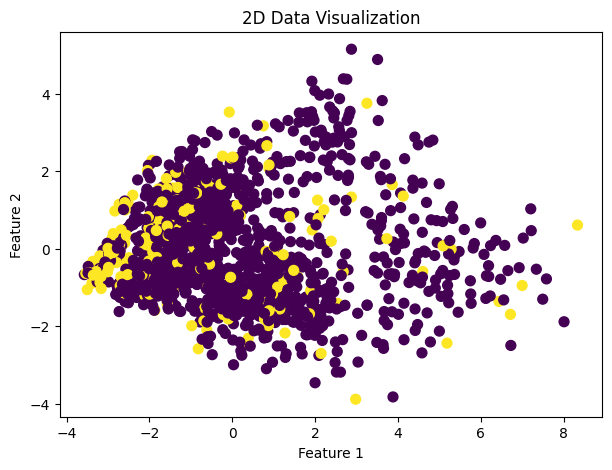

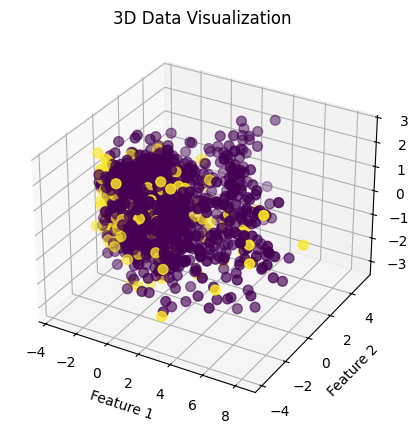

In [7]:
from sklearn.decomposition import PCA

pca2d = PCA(n_components = 2)
pca3d = PCA(n_components = 3)

pca5d = PCA(n_components = 5)
pca6d = PCA(n_components = 6)

X_2d = pca2d.fit_transform(X)
X_3d = pca3d.fit_transform(X)
X_5d = pca5d.fit_transform(X)
X_6d = pca6d.fit_transform(X)

visualize_X(X_2d, y)
visualize_X(X_3d, y)

### Thực hiện phân cụm

In [8]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score


In [9]:
y

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

**Tham số**

In [10]:
eps_list = [0.03, 0.05, 0.07, 0.9, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 5.0]
min_samples_list = [3, 5, 10, 20, 30, 44, 60, 100]
metrics = ["cosine", "euclidean"]

**Với dữ liệu ban đầu**

In [11]:
results = []

for eps in eps_list:
    for m in min_samples_list:
        for metric in metrics:
            db = DBSCAN(eps=eps, min_samples=m, metric=metric)
            labels = db.fit_predict(X) 
            core_samples_mask = (labels != -1)
            
            y_pred_filtered = labels[core_samples_mask].astype(int) 
            y_true_filtered = y[core_samples_mask].astype(int)

            if len(np.unique(y_pred_filtered)) < 2:
                score = -1e9
            else:
                score = adjusted_rand_score(y_true_filtered, y_pred_filtered)

            results.append({
                "eps": eps,
                "min_samples": m,
                "metric": metric,
                "ARI": score
            })

df = pd.DataFrame(results)

print(df.sort_values("ARI", ascending=False))

      eps  min_samples     metric           ARI
32   0.07            3     cosine  4.311923e-02
34   0.07            5     cosine  1.727553e-02
16   0.05            3     cosine  0.000000e+00
193  3.00            3  euclidean  0.000000e+00
64   0.10            3     cosine -2.268327e-03
..    ...          ...        ...           ...
219  5.00           44  euclidean -1.000000e+09
220  5.00           60     cosine -1.000000e+09
221  5.00           60  euclidean -1.000000e+09
222  5.00          100     cosine -1.000000e+09
223  5.00          100  euclidean -1.000000e+09

[224 rows x 4 columns]


**Với dữ liệu giảm về 2 chiều**

In [12]:
results = []

for eps in eps_list:
    for m in min_samples_list:
        for metric in metrics:
            db = DBSCAN(eps=eps, min_samples=m, metric=metric)
            labels = db.fit_predict(X_2d) 
            core_samples_mask = (labels != -1)
            
            y_pred_filtered = labels[core_samples_mask].astype(int) 
            y_true_filtered = y[core_samples_mask].astype(int)

            if len(np.unique(y_pred_filtered)) < 2:
                score = -1e9
            else:
                score = adjusted_rand_score(y_true_filtered, y_pred_filtered)

            results.append({
                "eps": eps,
                "min_samples": m,
                "metric": metric,
                "ARI": score
            })

df = pd.DataFrame(results)

print(df.sort_values("ARI", ascending=False))

      eps  min_samples     metric           ARI
105  0.30           30  euclidean  1.770543e-01
103  0.30           20  euclidean  6.447515e-02
85   0.20           10  euclidean  5.488786e-02
19   0.05            5  euclidean  4.749542e-02
107  0.30           44  euclidean  3.201865e-02
..    ...          ...        ...           ...
219  5.00           44  euclidean -1.000000e+09
220  5.00           60     cosine -1.000000e+09
221  5.00           60  euclidean -1.000000e+09
222  5.00          100     cosine -1.000000e+09
223  5.00          100  euclidean -1.000000e+09

[224 rows x 4 columns]


**Với dữ liệu còn 3 chiều**

In [13]:
results = []

for eps in eps_list:
    for m in min_samples_list:
        for metric in metrics:
            db = DBSCAN(eps=eps, min_samples=m, metric=metric)
            labels = db.fit_predict(X_3d) 
            core_samples_mask = (labels != -1)
            
            y_pred_filtered = labels[core_samples_mask].astype(int) 
            y_true_filtered = y[core_samples_mask].astype(int)

            if len(np.unique(y_pred_filtered)) < 2:
                score = -1e9
            else:
                score = adjusted_rand_score(y_true_filtered, y_pred_filtered)

            results.append({
                "eps": eps,
                "min_samples": m,
                "metric": metric,
                "ARI": score
            })

df = pd.DataFrame(results)

print(df.sort_values("ARI", ascending=False))

     eps  min_samples     metric           ARI
119  0.5           20  euclidean  9.217331e-02
83   0.2            5  euclidean  8.047380e-02
49   0.9            3  euclidean  3.727236e-03
145  1.0            3  euclidean  3.537117e-03
99   0.3            5  euclidean  3.122664e-03
..   ...          ...        ...           ...
219  5.0           44  euclidean -1.000000e+09
220  5.0           60     cosine -1.000000e+09
221  5.0           60  euclidean -1.000000e+09
222  5.0          100     cosine -1.000000e+09
223  5.0          100  euclidean -1.000000e+09

[224 rows x 4 columns]


**Với dữ liệu còn 5 chiều**

In [14]:
results = []

for eps in eps_list:
    for m in min_samples_list:
        for metric in metrics:
            db = DBSCAN(eps=eps, min_samples=m, metric=metric)
            labels = db.fit_predict(X_5d) 
            core_samples_mask = (labels != -1)
            
            y_pred_filtered = labels[core_samples_mask].astype(int) 
            y_true_filtered = y[core_samples_mask].astype(int)

            if len(np.unique(y_pred_filtered)) < 2:
                score = -1e9
            else:
                score = adjusted_rand_score(y_true_filtered, y_pred_filtered)

            results.append({
                "eps": eps,
                "min_samples": m,
                "metric": metric,
                "ARI": score
            })

df = pd.DataFrame(results)

print(df.sort_values("ARI", ascending=False))

      eps  min_samples     metric           ARI
42   0.07           44     cosine  4.431352e-02
113  0.50            3  euclidean  7.848346e-03
76   0.10           60     cosine  7.088992e-03
129  0.70            3  euclidean  4.132965e-03
161  1.50            3  euclidean  2.549738e-03
..    ...          ...        ...           ...
219  5.00           44  euclidean -1.000000e+09
220  5.00           60     cosine -1.000000e+09
221  5.00           60  euclidean -1.000000e+09
222  5.00          100     cosine -1.000000e+09
223  5.00          100  euclidean -1.000000e+09

[224 rows x 4 columns]


**Với dữ liệu giữ lại 90% thông tin**

In [15]:
from sklearn.decomposition import PCA

pca90 = PCA(n_components = 0.9)

X_90_percent = pca90.fit_transform(X)

In [16]:
results = []

for eps in eps_list:
    for m in min_samples_list:
        for metric in metrics:
            db = DBSCAN(eps=eps, min_samples=m, metric=metric)
            labels = db.fit_predict(X_90_percent) 
            core_samples_mask = (labels != -1)
            
            y_pred_filtered = labels[core_samples_mask].astype(int) 
            y_true_filtered = y[core_samples_mask].astype(int)

            if len(np.unique(y_pred_filtered)) < 2:
                score = -1e9
            else:
                score = adjusted_rand_score(y_true_filtered, y_pred_filtered)

            results.append({
                "eps": eps,
                "min_samples": m,
                "metric": metric,
                "ARI": score
            })

df = pd.DataFrame(results)

print(df.sort_values("ARI", ascending=False))

     eps  min_samples     metric           ARI
82   0.2            5     cosine  1.740467e-01
100  0.3           10     cosine  9.152824e-02
80   0.2            3     cosine  6.368240e-02
98   0.3            5     cosine  2.298826e-02
126  0.5          100     cosine  2.144516e-02
..   ...          ...        ...           ...
219  5.0           44  euclidean -1.000000e+09
220  5.0           60     cosine -1.000000e+09
221  5.0           60  euclidean -1.000000e+09
222  5.0          100     cosine -1.000000e+09
223  5.0          100  euclidean -1.000000e+09

[224 rows x 4 columns]


**Thực nghiệm với LDA**

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

In [18]:
results = []

for eps in eps_list:
    for m in min_samples_list:
        for metric in metrics:
            db = DBSCAN(eps=eps, min_samples=m, metric=metric)
            labels = db.fit_predict(X_lda) 
            core_samples_mask = (labels != -1)
            
            y_pred_filtered = labels[core_samples_mask].astype(int) 
            y_true_filtered = y[core_samples_mask].astype(int)

            if len(np.unique(y_pred_filtered)) < 2:
                score = -1e9
            else:
                score = adjusted_rand_score(y_true_filtered, y_pred_filtered)

            results.append({
                "eps": eps,
                "min_samples": m,
                "metric": metric,
                "ARI": score
            })

df = pd.DataFrame(results)

print(df.sort_values("ARI", ascending=False))

      eps  min_samples     metric           ARI
35   0.07            5  euclidean  2.325281e-01
33   0.07            3  euclidean  2.137004e-01
19   0.05            5  euclidean  2.126807e-01
17   0.05            3  euclidean  2.085779e-01
23   0.05           20  euclidean  1.951645e-01
..    ...          ...        ...           ...
219  5.00           44  euclidean -1.000000e+09
220  5.00           60     cosine -1.000000e+09
221  5.00           60  euclidean -1.000000e+09
222  5.00          100     cosine -1.000000e+09
223  5.00          100  euclidean -1.000000e+09

[224 rows x 4 columns]


## IV. Nhận xét


Dữ liệu ban đầu được giảm chiều xuống 2 và 3 chiều để phục vụ việc trực quan hóa. Quan sát các biểu đồ phân bố cho thấy các điểm dữ liệu của hai lớp bị chồng lấn khá nhiều, không xuất hiện các vùng tách biệt rõ ràng. Trong khi đó, DBSCAN là thuật toán phân cụm dựa trên mật độ, nên thường hoạt động tốt khi dữ liệu có các cụm dày đặc và được ngăn cách bởi các vùng thưa. 

DBSCAN được thử nghiệm trên nhiều phiên bản dữ liệu khác nhau, bao gồm dữ liệu gốc 44 chiều, dữ liệu sau khi giảm chiều bằng PCA (2D, 3D, 5D), dữ liệu PCA giữ lại 90% phương sai, và dữ liệu sau khi giảm chiều bằng LDA. Kết quả cho thấy trong hầu hết các trường hợp, chỉ số ARI đều rất thấp, đa phần dưới 10%, thậm chí có nhiều cấu hình cho giá trị ARI gần bằng 0 hoặc âm. Điều này cho thấy các cụm thu được hầu như không phản ánh đúng cấu trúc nhãn thực tế.

Kết quả tổng hợp được trình bày trong bảng sau:

| Data        | ARI cao nhất | Tham số tối ưu (ϵ, MinPts, Metric) | Nhận xét |
|---------------|-------------|------------------------------------|----------|
| Gốc 44D       | 0.0431      | ϵ = 0.07, MinPts = 3, Cosine      | Rất thấp. Cosine hoạt động tốt hơn Euclidean trong không gian chiều cao. |
| PCA 2D        | 0.1771      | ϵ = 0.30, MinPts = 30, Euclidean  | Cao nhất trong nhóm PCA, nén thông tin làm nổi bật chút cấu trúc cụm. |
| PCA 3D        | 0.0922      | ϵ = 0.5, MinPts = 20, Euclidean   | Hiệu suất giảm so với 2D. |
| PCA 5D        | 0.0443      | ϵ = 0.07, MinPts = 44, Cosine     | Hiệu suất kém, gần bằng dữ liệu gốc. |
| PCA 90% var   | 0.1740      | ϵ = 0.2, MinPts = 5, Cosine       | Gần với PCA 2D, PCA không cải thiện đáng kể khả năng phân cụm. |
| LDA           | 0.2325      | ϵ = 0.05, MinPts = 5, Euclidean   | Tốt nhất trong tất cả các phiên bản. LDA tối đa hóa tách lớp nên DBSCAN nhận ra phần cấu trúc giữa 2 lớp. |


**Khi dùng phân cụm DBSCAN với dữ liệu giảm chiều bằng LDA**

Cho kết quả tích cực hơn vì LDA kết hợp giảm chiều dựa trên độ tách lớp và phương sai theo từng lớp nên nó có thể 'nhìn' được chiều nào có độ tách lớp lớn nhất. DBSCAN đã nhận ra được một phần cấu trúc giữa 2 lớp nên có dự đoán kết quả cao hơn với chỉ số ARI là 23.2% với khoảng cách euclidean, eps = 0.05, min_sample = 5.

## V. Trực quan hóa

Trong trường hợp trực quan thì không thể nào có thể trực quan được với dữ liệu có số chiều quá lớn nên chung tôi trực quan bằng dữ liệu 1 chiều với LDA, 2 chiều với PCA, 3 chiều với PCA.

Vì cũng có rất nhiều trường hợp (tham số) trong mỗi lần thực nghiệm nên chúng tôi dùng các tham số trong các lần thực nghiệm cho kết quả là chỉ số ARI là cao nhất.

**Trực quan hóa 1 chiều với LDA**

In [19]:
import numpy as np
import matplotlib.pyplot as plt

db = DBSCAN(eps=0.05, min_samples=5, metric='euclidean')
labels = db.fit_predict(X_lda)

x = X_lda.reshape(-1)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

x = X_lda.reshape(-1)
unique_labels = sorted(set(labels))  
cmap = cm.get_cmap('tab10', len(unique_labels))  # tạo cmap đủ số cluster
label2color = {lb: cmap(i) for i, lb in enumerate(unique_labels)}


/tmp/ipykernel_44163/2612242556.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(unique_labels))  # tạo cmap đủ số cluster


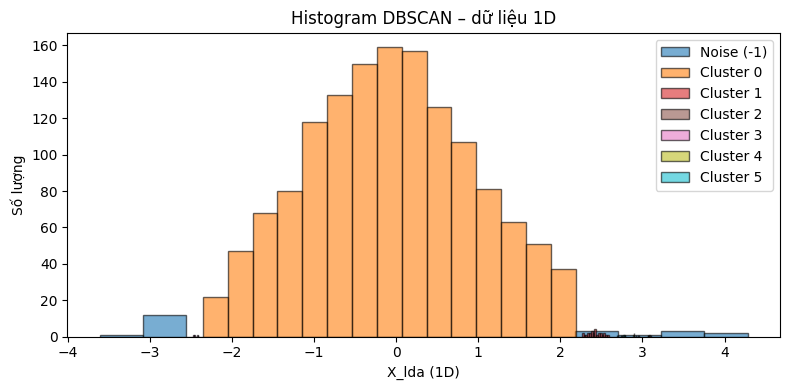

In [21]:
plt.figure(figsize=(8, 4))

for lb in unique_labels:
    plt.hist(
        x[labels == lb],
        bins=15,
        alpha=0.6,
        color=label2color[lb],
        edgecolor="black",
        label="Noise (-1)" if lb == -1 else f"Cluster {lb}"
    )

plt.xlabel("X_lda (1D)")
plt.ylabel("Số lượng")
plt.title("Histogram DBSCAN – dữ liệu 1D")
plt.legend()
plt.tight_layout()
plt.show()


Nhận xét:

Nhìn vào Histogram trên đây có thể thấy được là phần lớn là các cột màu vàng, ngoài ra các cột màu xanh tức là nhiễu của dữ liệu, phần nhỏ màu xanh và đỏ là các cụm nhỏ khác.

Cột màu vàng thể hiện rằng cụm này chiếm ưu thế tuyệt đối về số lượng điểm, nằm ở trung tâm của phân bố dữ liệu. Phân bố của cụm 0 có hình dạng gần giống với phân phối chuẩn (Gaussian), đỉnh điểm nằm quanh giá trị $0$. 

Cluster 1, 2, .. rất nhỏ nằm ở lận lượt bên trái và bên phải của cluster chính với số lượng nhỏ, cực kì ít, cho thấy rằng các cụm này là các cụm độc lập, nằm ngay sát cụm chính, có mật độ cao nhưng số lượng không nhiều

Nhiễu đại diện cho những điểm không đủ mật độ để được gán vào bất kỳ cụm nào.

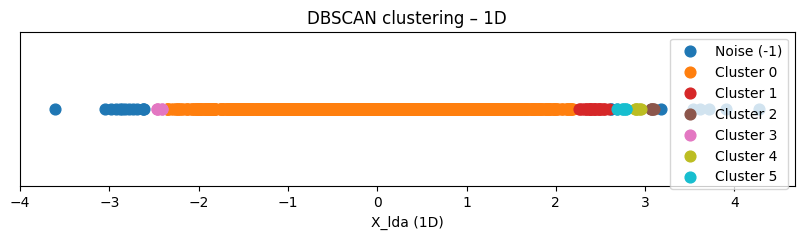

In [22]:
plt.figure(figsize=(10, 2))

for lb in unique_labels:
    plt.scatter(
        x[labels == lb],
        np.zeros_like(x[labels == lb]),
        color=label2color[lb],
        s=60,
        label="Noise (-1)" if lb == -1 else f"Cluster {lb}"
    )

plt.yticks([])
plt.xlabel("X_lda (1D)")
plt.title("DBSCAN clustering – 1D")
plt.legend()
plt.show()


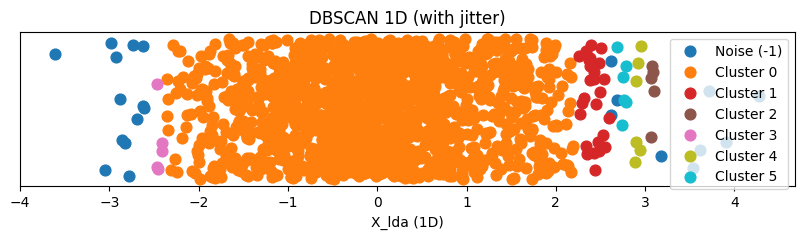

In [23]:
y = np.random.uniform(-0.02, 0.02, size=len(x))

plt.figure(figsize=(10, 2))

for lb in unique_labels:
    plt.scatter(
        x[labels == lb],
        y[labels == lb],
        color=label2color[lb],
        s=60,
        label="Noise (-1)" if lb == -1 else f"Cluster {lb}"
    )

plt.yticks([])
plt.xlabel("X_lda (1D)")
plt.title("DBSCAN 1D (with jitter)")
plt.legend()
plt.show()


**Trực quan dữ liệu 2 chiều với PCA**

PCA 2D|0.0979|eps=0.3|min_samples=30|euclidean

In [24]:
import numpy as np
import matplotlib.pyplot as plt

db = DBSCAN(eps=0.3, min_samples=30, metric='euclidean')
labels = db.fit_predict(X_2d)

In [25]:
labels

array([-1, -1, -1, ...,  1, -1,  1], shape=(1470,))

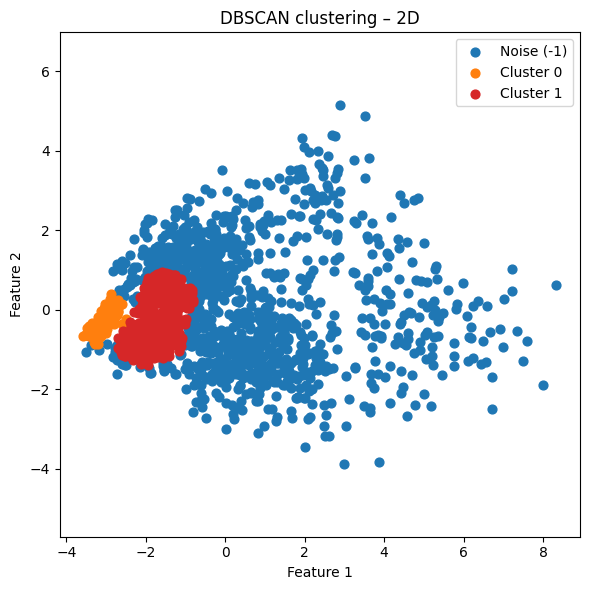

In [26]:

plt.figure(figsize=(6, 6))

for lb in sorted(set(labels)):
    plt.scatter(
        X_2d[labels == lb, 0],
        X_2d[labels == lb, 1],
        s=40,
        color=label2color.get(lb, 'gray'),
        label='Noise (-1)' if lb == -1 else f'Cluster {lb}'
    )

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN clustering – 2D")
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()


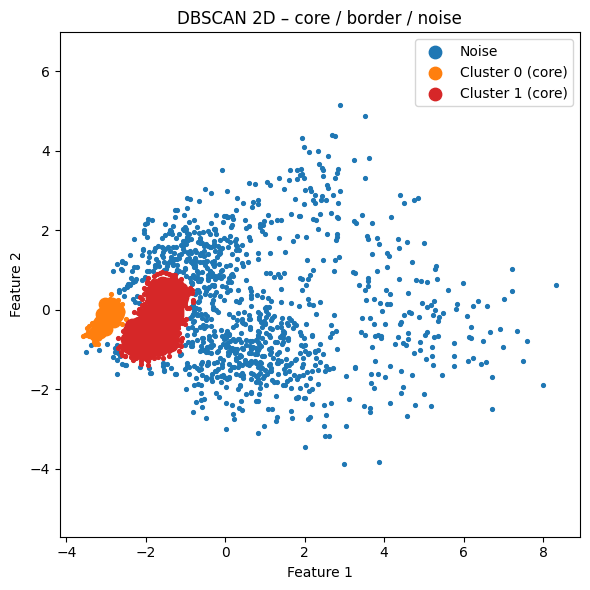

In [27]:
core_mask = np.zeros_like(labels, dtype=bool)
core_mask[db.core_sample_indices_] = True

plt.figure(figsize=(6, 6))

for lb in sorted(set(labels)):
    color = label2color.get(lb, 'gray')

    plt.scatter(
        X_2d[(labels == lb) & core_mask, 0],
        X_2d[(labels == lb) & core_mask, 1],
        s=80,
        color=color,
        marker='o',
        label=f'Cluster {lb} (core)' if lb != -1 else 'Noise'
    )

    plt.scatter(
        X_2d[(labels == lb) & ~core_mask, 0],
        X_2d[(labels == lb) & ~core_mask, 1],
        s=30,
        color=color,
        marker='.'
    )

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN 2D – core / border / noise")
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()


Nhận xét:

DBScan đã nhận diện được 2 cluster chính là 0 và 1, ngoài ra là các điểm nhiễu của dữ liệu phân bố rộng rãi.

Cluster 0 nằm tiếp giáp với Cluster 1. Điều này cho thấy mật độ của hai cụm này có thể đủ gần để nếu tham số $\epsilon$ (bán kính) lớn hơn một chút, chúng có thể bị gộp thành một cụm duy nhất.

Cả Cluster 0 và Cluster 1 đều là những khu vực có mật độ điểm rất cao, được tách biệt rõ ràng khỏi hầu hết các điểm còn lại. DBSCAN đã hoạt động hiệu quả trong việc nhận dạng những khu vực tập trung điểm này.

**Trực quan dữ liệu 3 chiều với PCA**

In [28]:
import numpy as np
import matplotlib.pyplot as plt

db = DBSCAN(eps=0.5, min_samples=20, metric='euclidean')
labels = db.fit_predict(X_3d)

/tmp/ipykernel_44163/490704733.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab10", len(unique_labels))


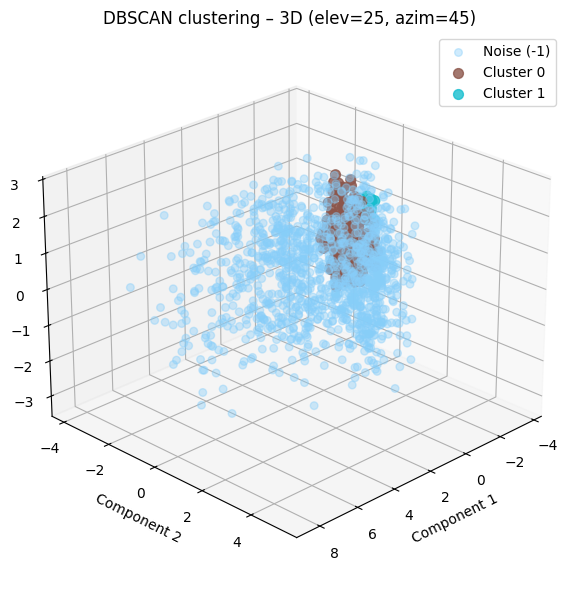

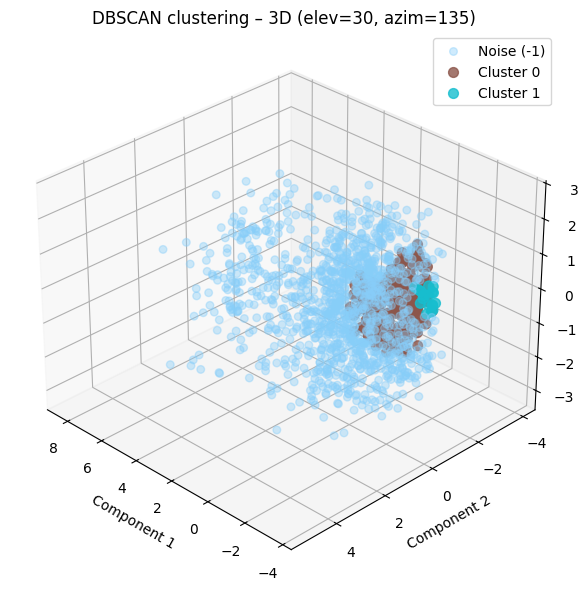

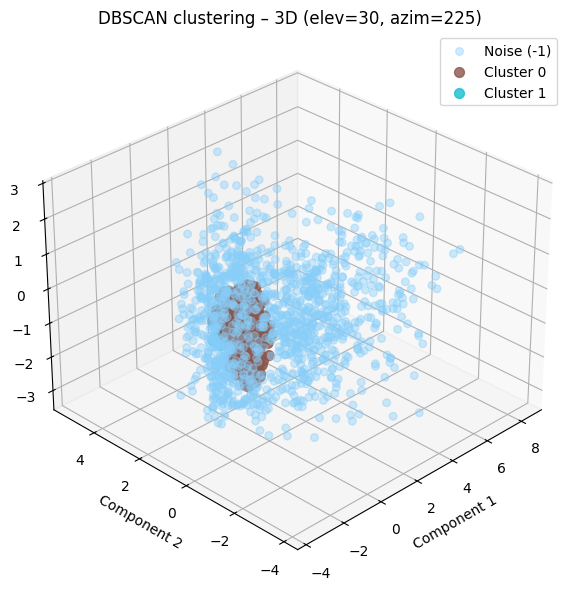

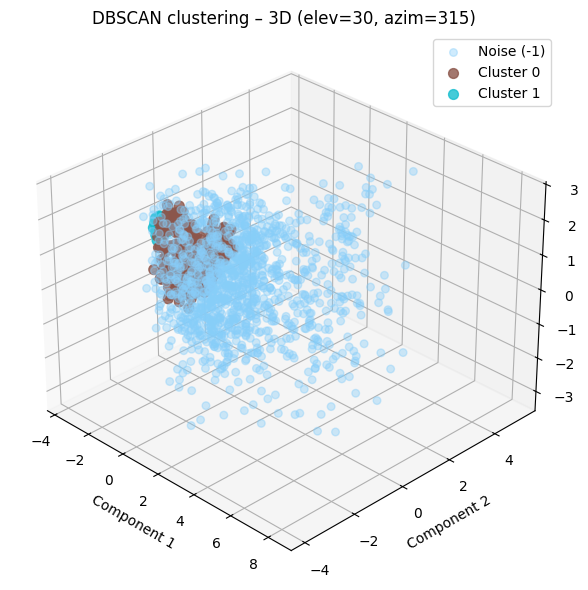

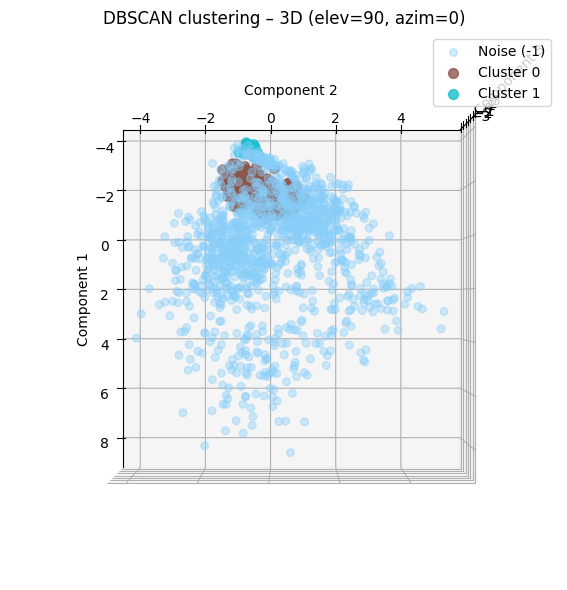

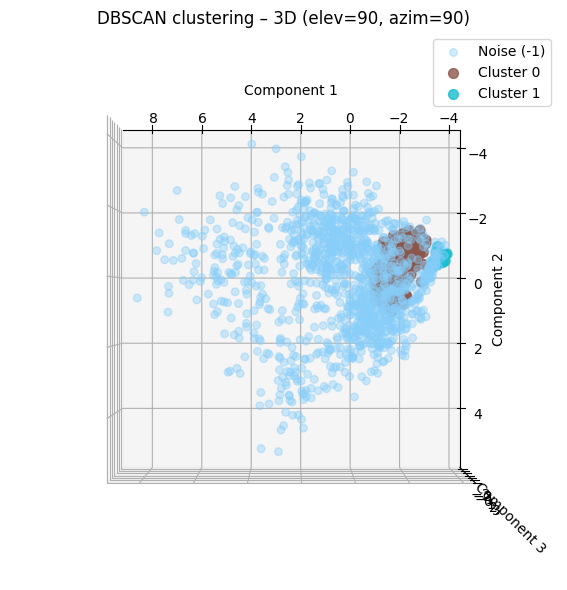

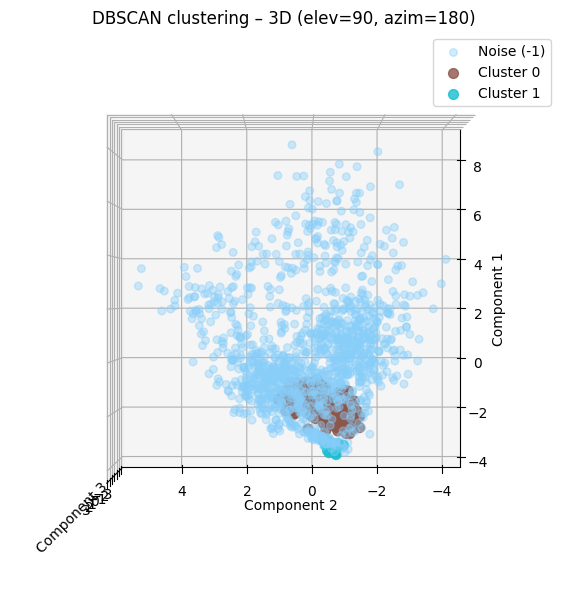

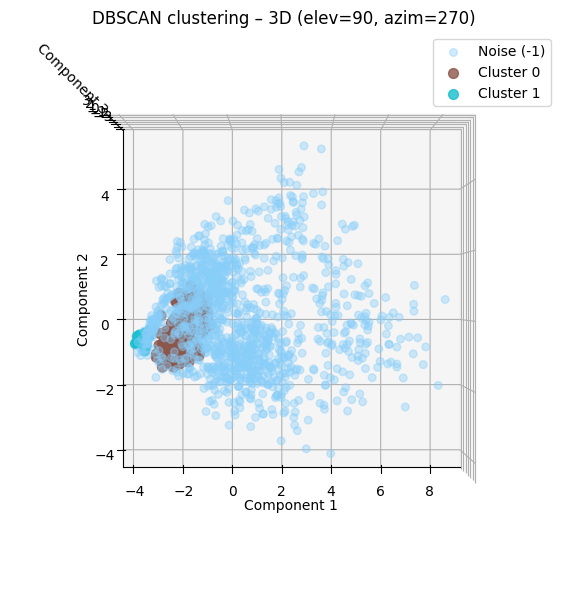

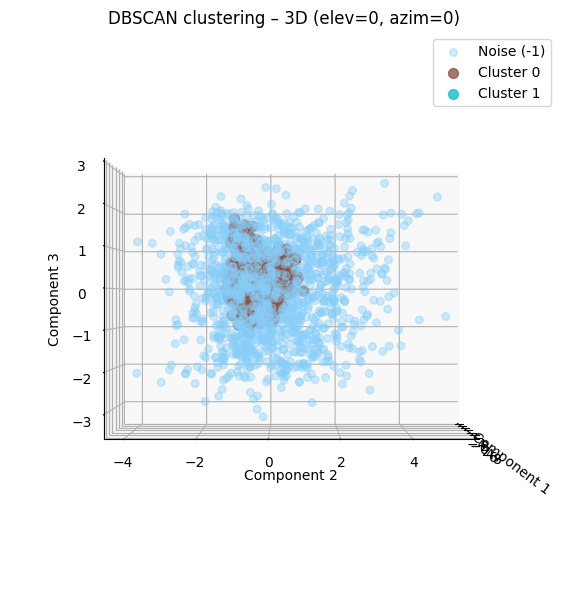

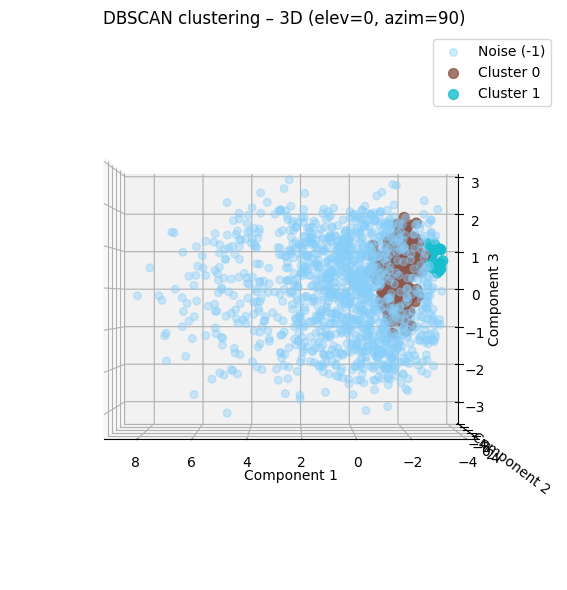

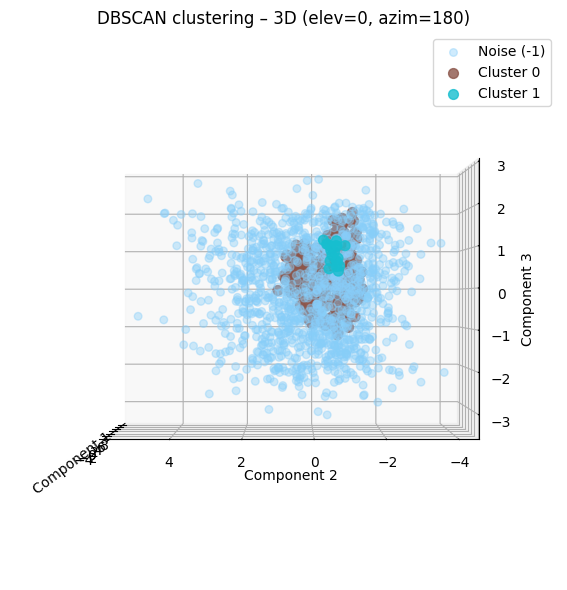

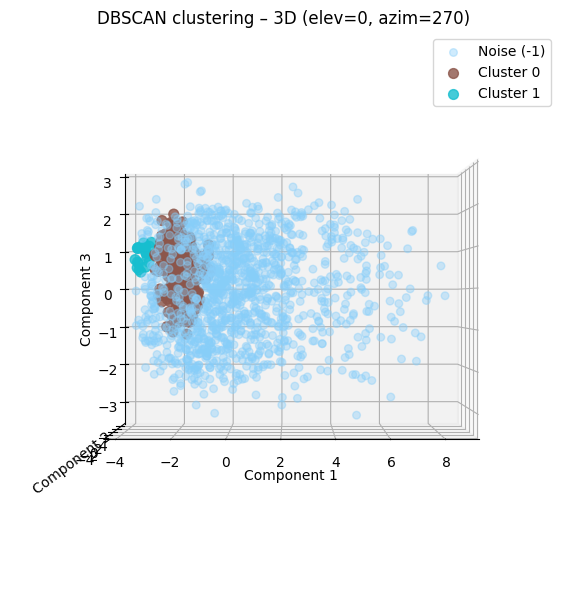

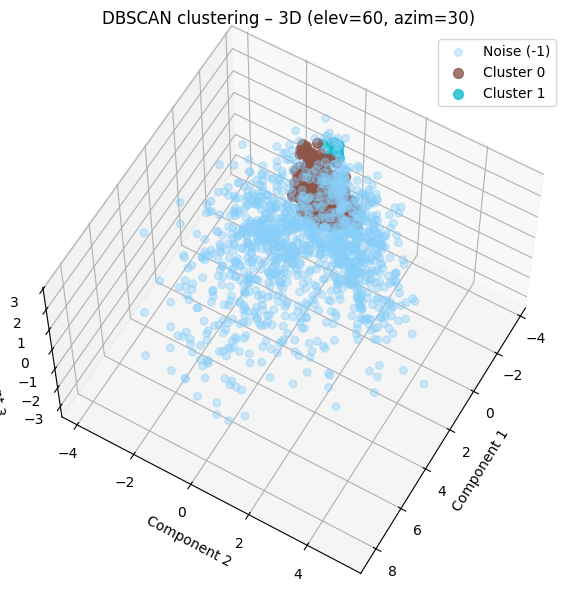

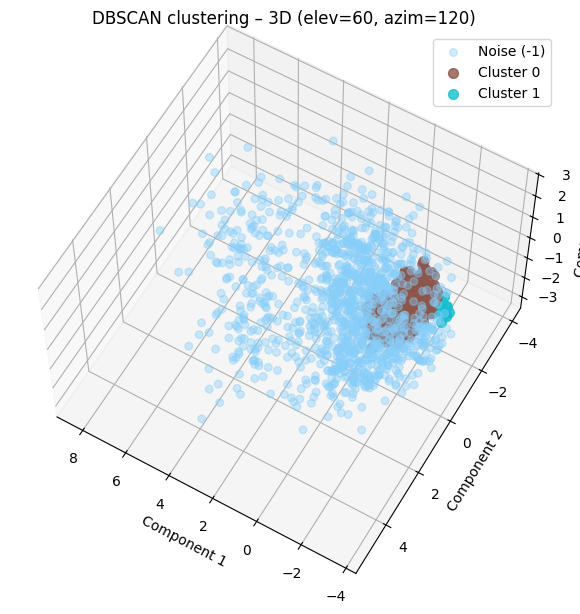

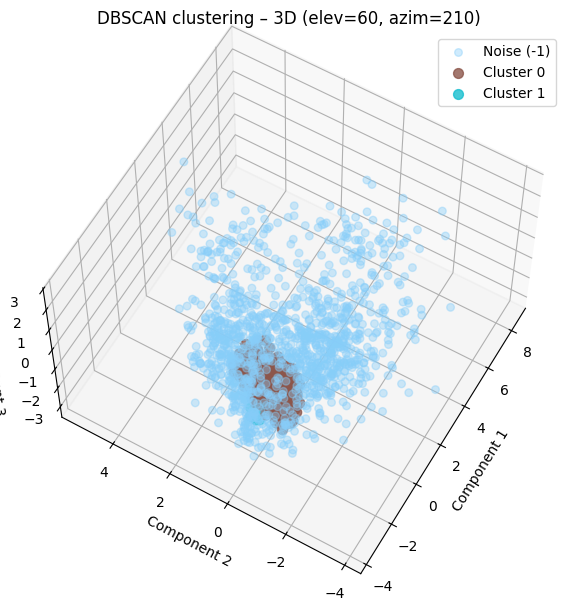

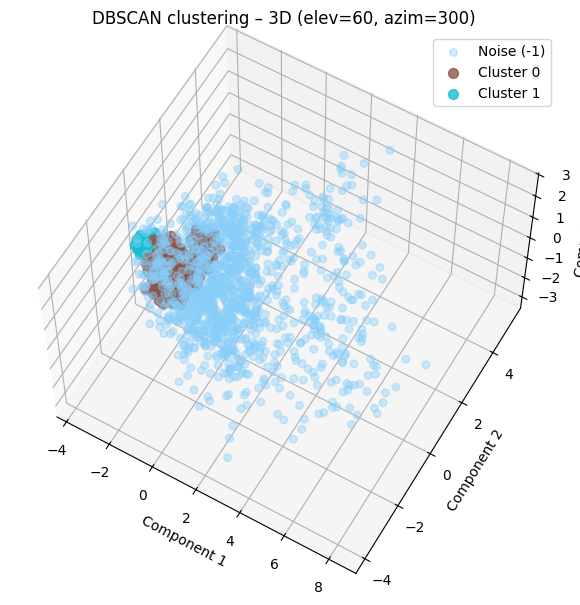

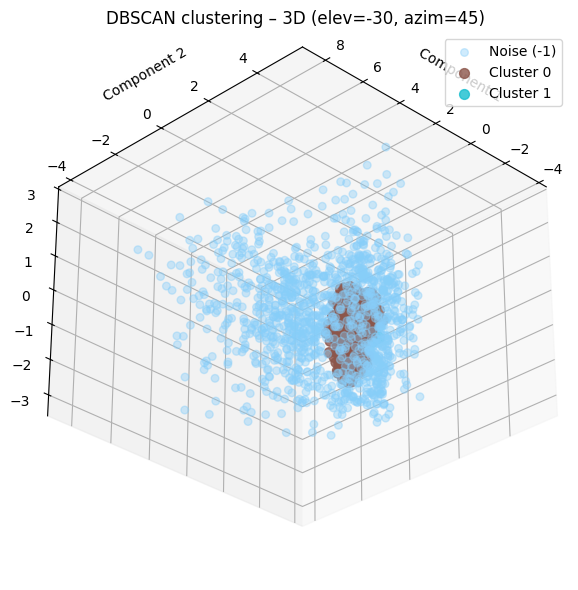

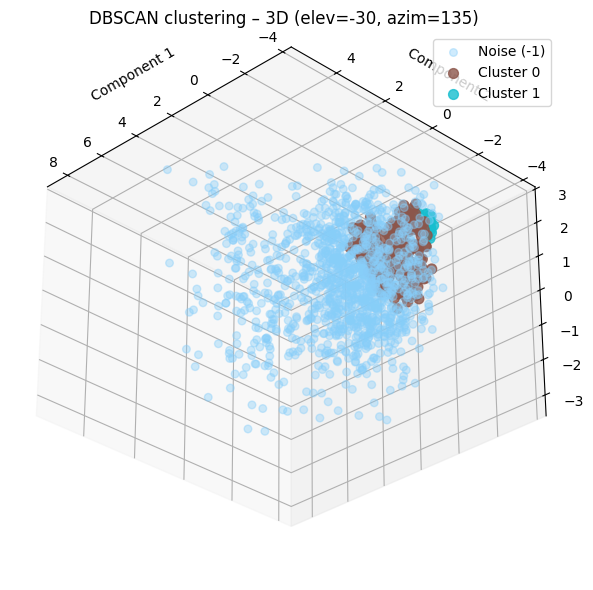

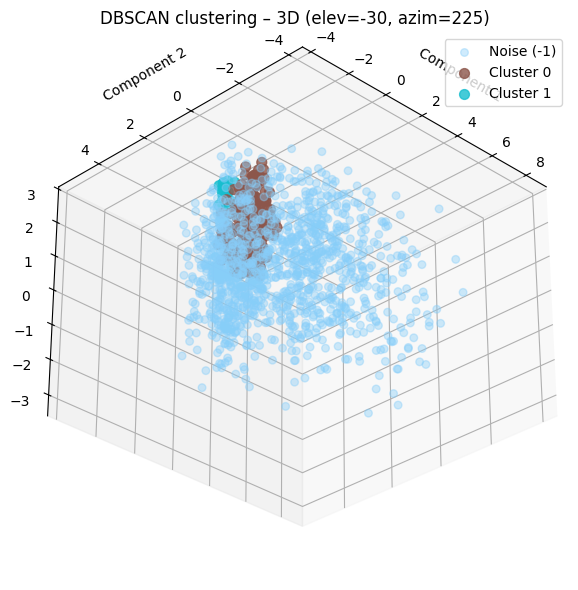

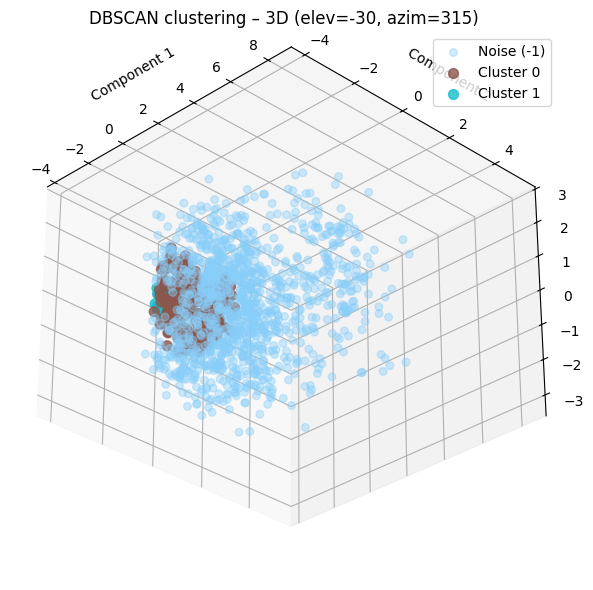

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

X = np.asarray(X_3d)
labels = np.asarray(labels)

unique_labels = sorted(set(labels))

cmap = cm.get_cmap("tab10", len(unique_labels))
label2color = {lb: cmap(i) for i, lb in enumerate(unique_labels)}

views = [
    (25, 45), (30, 135), (30, 225), (30, 315),
    (90, 0), (90, 90), (90, 180), (90, 270),
    (0, 0), (0, 90), (0, 180), (0, 270),
    (60, 30), (60, 120), (60, 210), (60, 300),
    (-30, 45), (-30, 135), (-30, 225), (-30, 315),
]


for elev, azim in views:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    for lb in unique_labels:
        mask = labels == lb

        if lb == -1:
            ax.scatter(
                X[mask, 0],
                X[mask, 1],
                X[mask, 2],
                c="lightskyblue",
                s=30,
                alpha=0.4,
                label="Noise (-1)"
            )
        else:
            ax.scatter(
                X[mask, 0],
                X[mask, 1],
                X[mask, 2],
                c=[label2color[lb]],
                s=50,
                alpha=0.8,
                label=f"Cluster {lb}"
            )

    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    ax.set_title(f"DBSCAN clustering – 3D (elev={elev}, azim={azim})")

    ax.view_init(elev=elev, azim=azim)
    ax.legend()
    plt.tight_layout()
    plt.show()


**Trực quan 3D**

Dưới đây là phần trực quan 3d việc phân cụm bằng DBSCAN sử dụng `plotly`, ở đây khi chạy sẽ có file `dbscan_3d_interactive.html` và mở file này bằng trình duyệt để có thể thấy được rõ hơn.

In [30]:
pip install plotly


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /media/trong-thanh/Data/University/Third Year/I/Machine Learning/Project Machine Learning/.venv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
import plotly.express as px
import pandas as pd
import os

labels_str = labels.astype(str)
labels_str[labels == '-1'] = "Noise (-1)" 

color_map = {
    'Noise (-1)': 'lightskyblue',
    '0': 'gold',
    '1': 'green',
    '2': 'red' 
}

df = pd.DataFrame({
    "x": X[:, 0],
    "y": X[:, 1],
    "z": X[:, 2],
    "cluster": labels_str
})

fig = px.scatter_3d(
    df,
    x="x",
    y="y",
    z="z",
    color="cluster",
    color_discrete_map=color_map, 
    opacity=0.8,
    title="DBSCAN clustering (3D interactive)",
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(
    legend_title_text="Cluster",
    scene=dict(
        xaxis_title="Component 1",
        yaxis_title="Component 2",
        zaxis_title="Component 3",
    ),
)

output_file = "dbscan_3d_interactive.html"

if os.path.exists(output_file):
    print(f"File '{output_file}' đã tồn tại → ghi đè")

fig.write_html(output_file)
print(f"Đã lưu biểu đồ 3D vào '{output_file}'")


File 'dbscan_3d_interactive.html' đã tồn tại → ghi đè
Đã lưu biểu đồ 3D vào 'dbscan_3d_interactive.html'
